<a href="https://colab.research.google.com/github/Yogesh-8998/Yogesh-Patil/blob/main/CHD_Risk_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
 import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from operator import add
import seaborn as sns
 
%matplotlib inline
 
 
import warnings
warnings.filterwarnings('ignore')

In [3]:
 df = pd.read_csv("/content/drive/MyDrive/Almabetter /Machine Learning/Capstone Project /data_cardiovascular_risk.csv")

In [4]:
df.head()

id  age  education sex  ...    BMI  heartRate  glucose  TenYearCHD
0   0   64        2.0   F  ...    NaN       90.0     80.0           1
1   1   36        4.0   M  ...  29.77       72.0     75.0           0
2   2   46        1.0   F  ...  20.35       88.0     94.0           0
3   3   50        1.0   M  ...  28.26       68.0     94.0           1
4   4   64        1.0   F  ...  26.42       70.0     77.0           0

[5 rows x 17 columns]

In [5]:
df.describe()

id          age  ...      glucose   TenYearCHD
count  3390.000000  3390.000000  ...  3086.000000  3390.000000
mean   1694.500000    49.542183  ...    82.086520     0.150737
std     978.753033     8.592878  ...    24.244753     0.357846
min       0.000000    32.000000  ...    40.000000     0.000000
25%     847.250000    42.000000  ...    71.000000     0.000000
50%    1694.500000    49.000000  ...    78.000000     0.000000
75%    2541.750000    56.000000  ...    87.000000     0.000000
max    3389.000000    70.000000  ...   394.000000     1.000000

[8 rows x 15 columns]

In [6]:
df.shape

(3390, 17)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

Exploratry Data Analysis

In [8]:
#Missing values
#total percentage of missing data
missing_data = df.isnull().sum()
total_percentage = (missing_data.sum()/df.shape[0]) * 100
print(f'The total percentage of missing data is {round(total_percentage,2)}%')

The total percentage of missing data is 15.04%


In [9]:
 # percentage of missing data per category
total = df.isnull().sum().sort_values(ascending=False)
percent_total = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100
missing = pd.concat([total, percent_total], axis=1, keys=["Total", "Percentage"])
missing_data = missing[missing['Total']>0]
missing_data

Total  Percentage
glucose       304    8.967552
education      87    2.566372
BPMeds         44    1.297935
totChol        38    1.120944
cigsPerDay     22    0.648968
BMI            14    0.412979
heartRate       1    0.029499

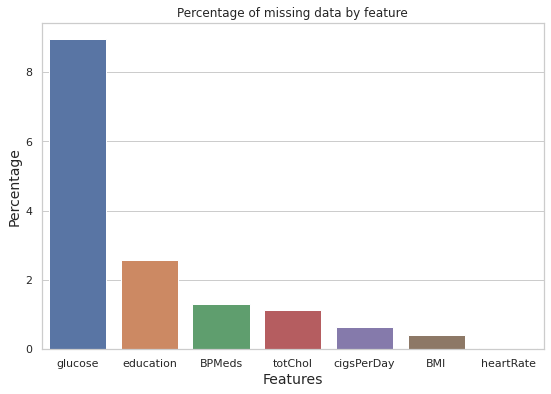

In [10]:
plt.figure(figsize=(9,6))
sns.set(style="whitegrid")
sns.barplot(x=missing_data.index, y=missing_data['Percentage'], data = missing_data)
plt.title('Percentage of missing data by feature')
plt.xlabel('Features', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.show()

Glucose level has the highest percentage of missing values i.e 8.96%, remaing have very few missing values. As of total 15.04% missing values we have.

In [11]:
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

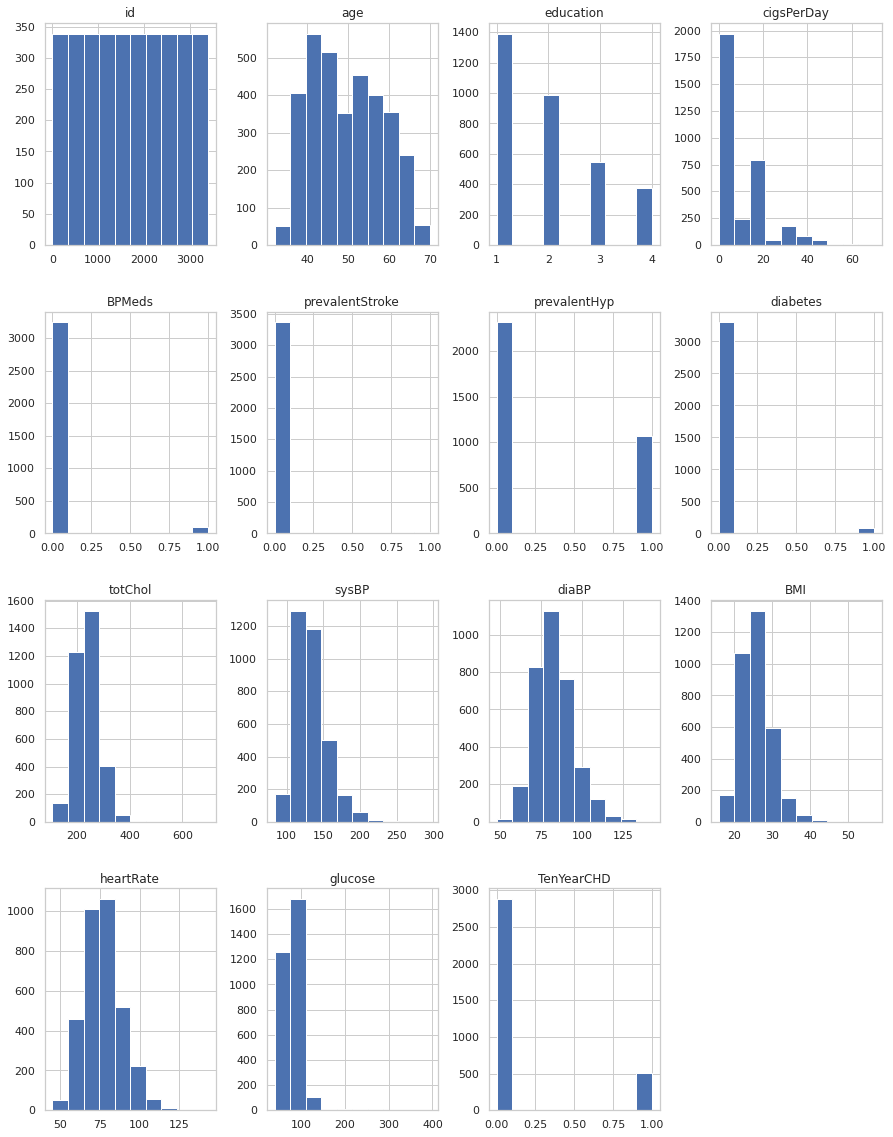

In [12]:
 # plot histogram to see the distribution of the data
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

As prevstroke, diabetes and BP meds are too poorly balanced data

Case counts

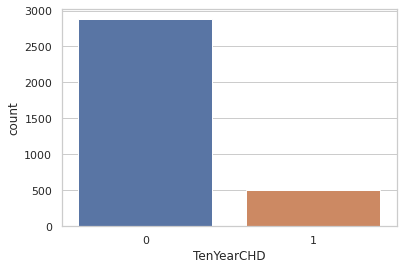

There are 2879 patients without heart disease and 511 patients with the disease


In [13]:
sns.countplot(x='TenYearCHD',data=df)
plt.show()
cases = df.TenYearCHD.value_counts()
print(f"There are {cases[0]} patients without heart disease and {cases[1]} patients with the disease")

No. of people disease vs Age

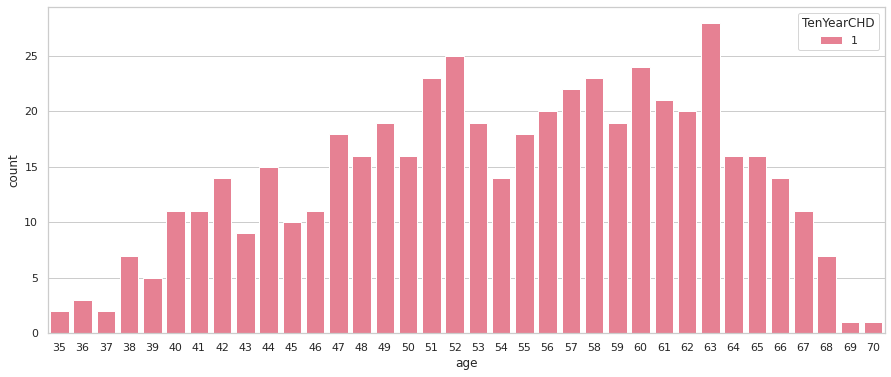

In [14]:
plt.figure(figsize=(15,6))
sns.countplot(x='age',data = df[df["TenYearCHD"]==1], hue = 'TenYearCHD',palette='husl')
plt.show()

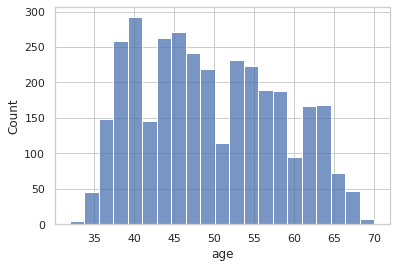

In [15]:
 sns.histplot(df['age'])

The People With the highest risk of developing CHD are b/w 51 and 63

Correlation Heatmap

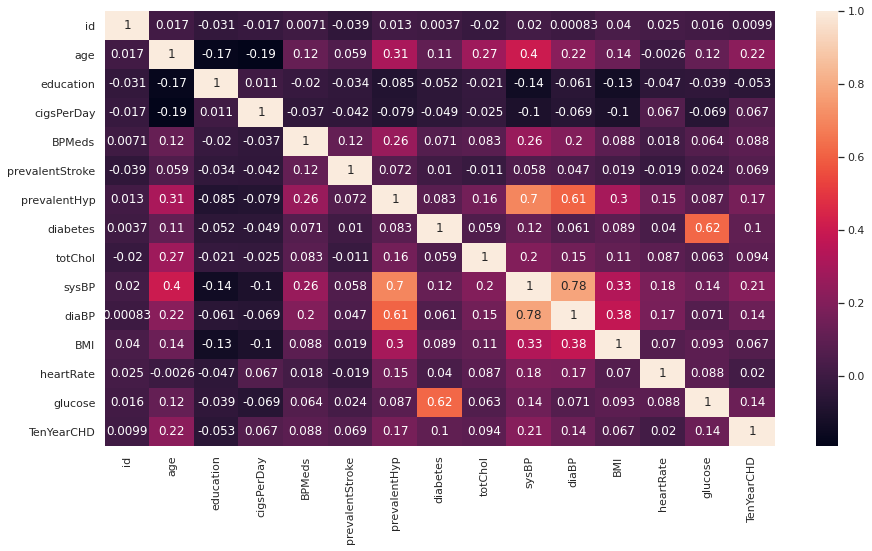

In [16]:
 
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot = True)
plt.show()

High Correlation b/w the independant valiables systolic Bp and pevalentHyp, dia BP and pevalent Hyp, glucose and diabetes, systolic BP and Distolic BP

High Correlation b/w Target and independent vars are Age, prevalent Hyp, Systolic BP, glucose, Distolic BP and Diabetes. As if 6 vars are good corelating.

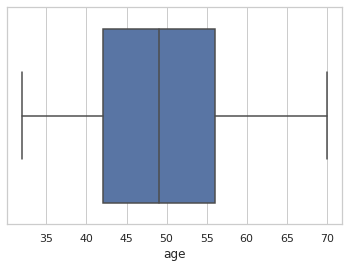

In [17]:
 
import seaborn as sns
 
sns.boxplot(df['age'])

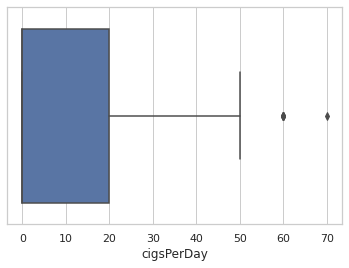

In [18]:
 sns.boxplot(df['cigsPerDay'])

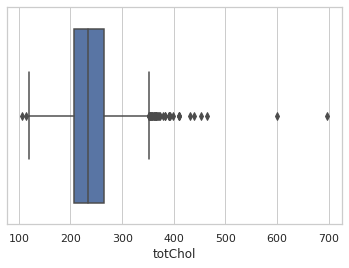

In [19]:
 sns.boxplot(df['totChol'])

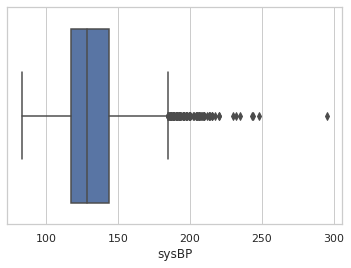

In [20]:
 sns.boxplot(df['sysBP'])

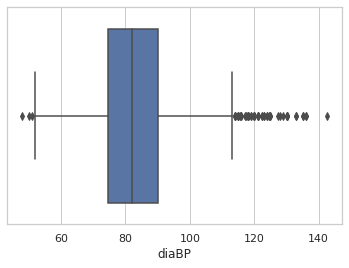

In [21]:
 sns.boxplot(df['diaBP'])

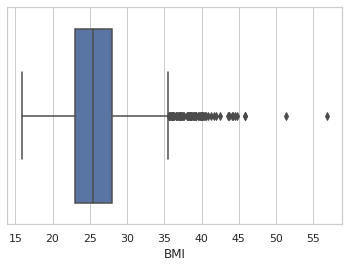

In [22]:
 sns.boxplot(df['BMI'])

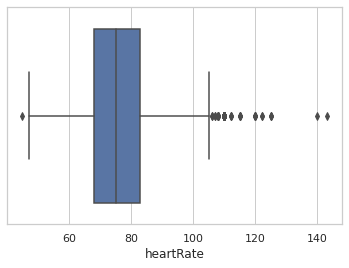

In [23]:
 sns.boxplot(df['heartRate'])

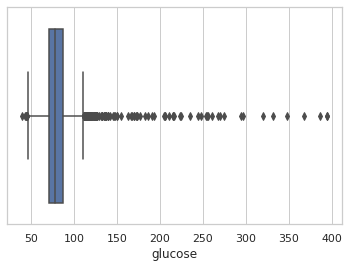

In [24]:
 sns.boxplot(df['glucose'])

In [25]:
 num_cat=['age', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose']

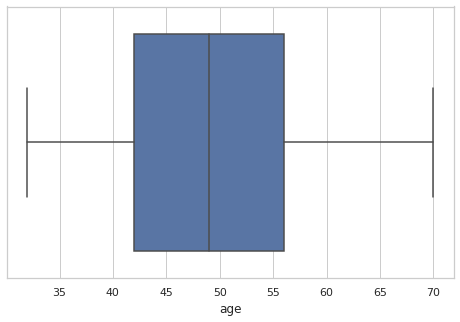

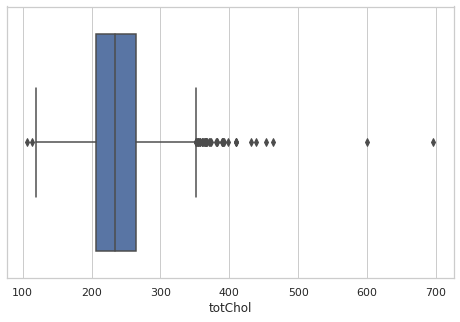

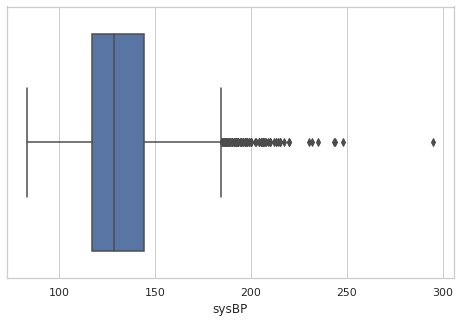

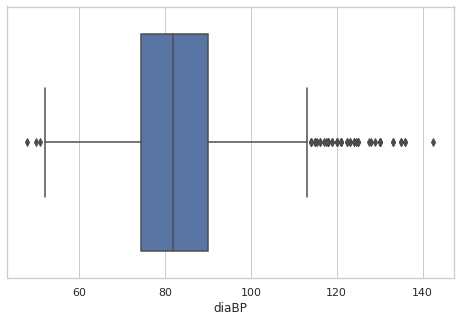

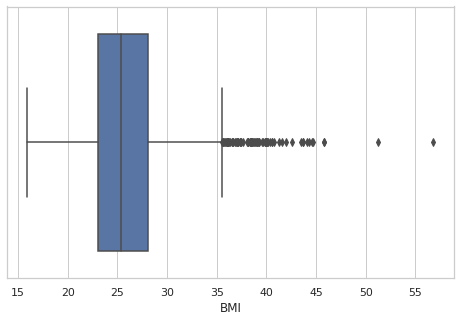

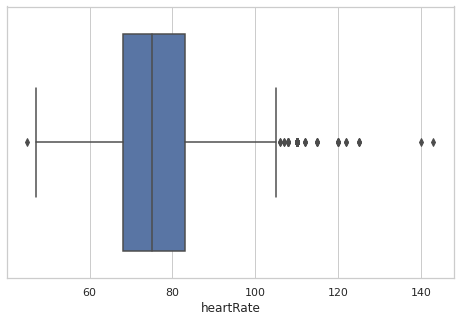

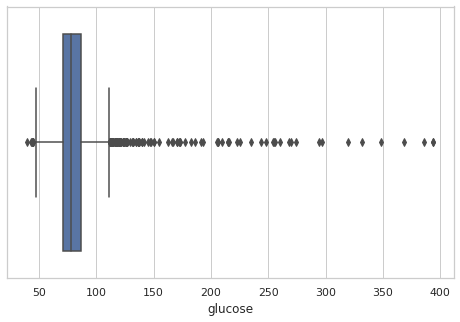

In [26]:
 for i in num_cat:
  plt.figure(figsize=(8,5))
  sns.boxplot(df[i])

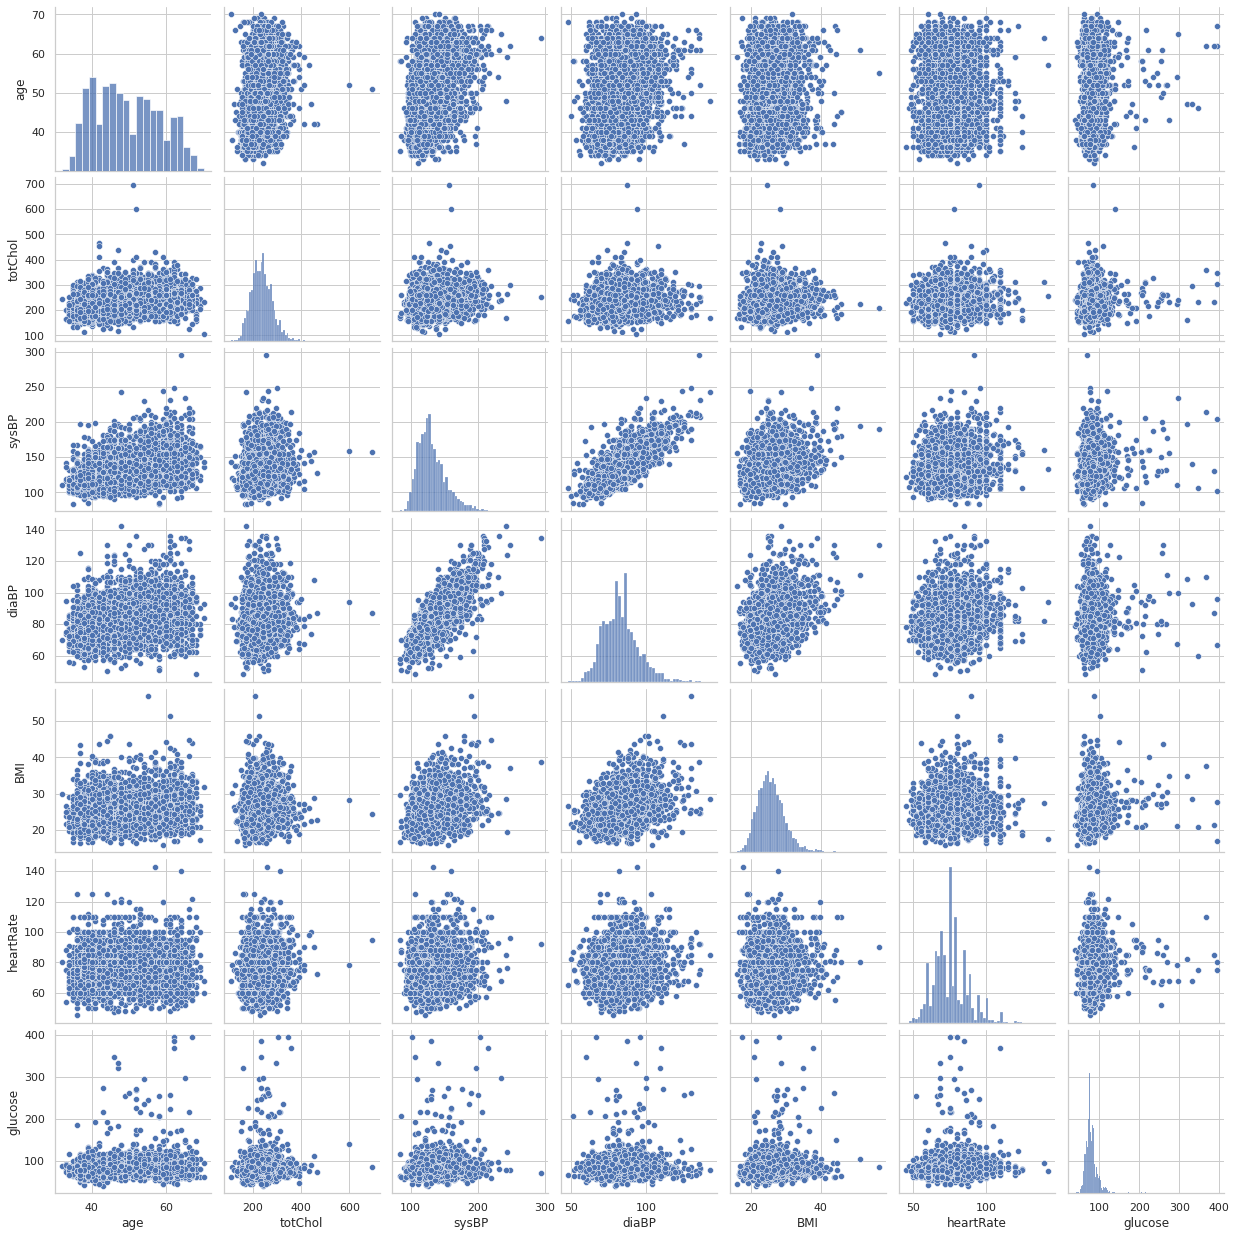

In [27]:
 sns.pairplot(df[num_cat])

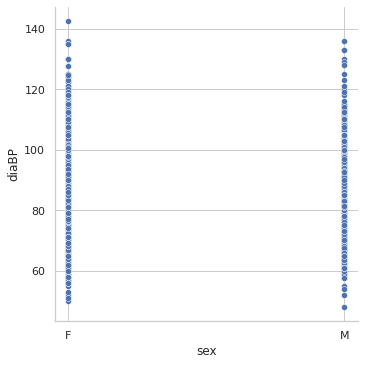

In [28]:
 sns.relplot(df['sex'],df['diaBP'])

Data Preprocessing


In [29]:
# Dropping id column
 
df.drop('id', inplace=True, axis=1)

In [30]:
df_new = df.copy()

In [31]:
df_new['sex'] = np.where(df.sex=='F', 1, 0)
df_new['is_smoking'] = np.where(df['is_smoking']=='YES', 1, 0)

In [32]:
df_new.head()

age  education  sex  is_smoking  ...    BMI  heartRate  glucose  TenYearCHD
0   64        2.0    1           1  ...    NaN       90.0     80.0           1
1   36        4.0    0           0  ...  29.77       72.0     75.0           0
2   46        1.0    1           1  ...  20.35       88.0     94.0           0
3   50        1.0    0           1  ...  28.26       68.0     94.0           1
4   64        1.0    1           1  ...  26.42       70.0     77.0           0

[5 rows x 16 columns]

In [ ]:
print(df_new['cigsPerDay'].head(20))

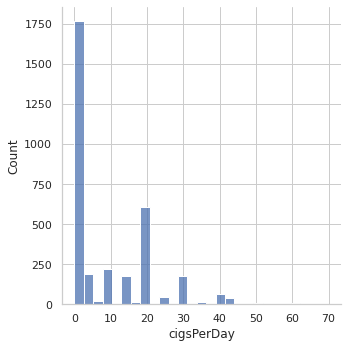

In [ ]:
 sns.displot(df.cigsPerDay)

In [33]:
df_new['education'].fillna(0,inplace=True)

In [34]:
#df_new['BPMeds'].fillna(0,inplace=True)

In [35]:
 df_new['BPMeds'].fillna(df['BPMeds'].median(), inplace=True)

In [36]:
#df_new['cigsPerDay'].fillna(0,inplace=True)

In [37]:
 df_new['cigsPerDay'].fillna(df['cigsPerDay'].median(), inplace=True)

In [38]:
#df_new['totChol'].fillna(0,inplace=True)

In [39]:
 df_new['totChol'].fillna(df['totChol'].median(), inplace=True)

In [40]:
#df_new['BMI'].fillna(0,inplace=True)

In [41]:
 df_new['BMI'].fillna(df['BMI'].median(), inplace=True)

In [42]:
#df_new['glucose'].fillna(0,inplace=True)

In [43]:
 df_new['glucose'].fillna(df['glucose'].median(), inplace=True)

In [44]:
#df_new['heartRate'].fillna(0,inplace=True)

In [45]:
 df_new['heartRate'].fillna(df['heartRate'].median(), inplace=True)

In [46]:
 df_new[df_new.cigsPerDay==0]['TenYearCHD'].value_counts()

0    1488
1     237
Name: TenYearCHD, dtype: int64

In [47]:
 df_new[(df_new.cigsPerDay<=20)&(df.cigsPerDay>0)]['TenYearCHD'].value_counts()

0    1104
1     197
Name: TenYearCHD, dtype: int64

In [48]:
 df_new[(df_new.cigsPerDay>20)]['TenYearCHD'].value_counts()

0    287
1     77
Name: TenYearCHD, dtype: int64

Bins For CigsPerDay

In [49]:
 def cig_cat(x):
  if x==0:
    return "zero"
  elif x>0 and x<=20:
    return "low cigs"
  elif x>20:
    return "high risk"
df_new['cigs_cat']=df.cigsPerDay.apply(cig_cat)
df_new.head()

age  education  sex  is_smoking  ...  heartRate  glucose  TenYearCHD   cigs_cat
0   64        2.0    1           1  ...       90.0     80.0           1   low cigs
1   36        4.0    0           0  ...       72.0     75.0           0       zero
2   46        1.0    1           1  ...       88.0     94.0           0   low cigs
3   50        1.0    0           1  ...       68.0     94.0           1   low cigs
4   64        1.0    1           1  ...       70.0     77.0           0  high risk

[5 rows x 17 columns]

Doing log transform on skewness

In [50]:
 for i in  ['glucose','heartRate','BMI','totChol','sysBP']:
  df_new[i]=np.log(df_new[i])

In [51]:
df_new.head()

age  education  sex  is_smoking  ...  heartRate   glucose  TenYearCHD   cigs_cat
0   64        2.0    1           1  ...   4.499810  4.382027           1   low cigs
1   36        4.0    0           0  ...   4.276666  4.317488           0       zero
2   46        1.0    1           1  ...   4.477337  4.543295           0   low cigs
3   50        1.0    0           1  ...   4.219508  4.543295           1   low cigs
4   64        1.0    1           1  ...   4.248495  4.343805           0  high risk

[5 rows x 17 columns]

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3390 non-null   float64
 2   sex              3390 non-null   int64  
 3   is_smoking       3390 non-null   int64  
 4   cigsPerDay       3390 non-null   float64
 5   BPMeds           3390 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3390 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3390 non-null   float64
 13  heartRate        3390 non-null   float64
 14  glucose          3390 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
 16  cigs_cat         3368 non-null   object 
dtypes: float64(9),

In [ ]:
df_new.describe()

age    education  ...      glucose   TenYearCHD
count  3390.000000  3390.000000  ...  3390.000000  3390.000000
mean     49.542183     1.920354  ...    81.720059     0.150737
std       8.592878     1.053104  ...    23.161265     0.357846
min      32.000000     0.000000  ...    40.000000     0.000000
25%      42.000000     1.000000  ...    72.000000     0.000000
50%      49.000000     2.000000  ...    78.000000     0.000000
75%      56.000000     3.000000  ...    85.000000     0.000000
max      70.000000     4.000000  ...   394.000000     1.000000

[8 rows x 16 columns]

In [52]:
 df_new=pd.get_dummies(df_new, columns=['cigs_cat'],drop_first=True)

In [53]:
 X=df_new.drop(['TenYearCHD','education','cigsPerDay'],axis=1)
Y=df_new['TenYearCHD']

In [54]:
 print(X.shape)
print(Y.shape)

(3390, 15)
(3390,)


In [ ]:
# Creating the dataset with all independent variables
X = df_new.iloc[:,:-1]
 
# Creating the dataset with the dependent variable
Y = df_new.iloc[:,-1]

In [55]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0, stratify = Y)

In [56]:
 
from sklearn.preprocessing import StandardScaler
standard = StandardScaler()
fit_Transform = standard.fit_transform(X_train)
fit_Transform

array([[-0.18280809,  0.88357003, -0.99265236, ..., -0.12102609,
        -0.78806094,  0.99265236],
       [-0.18280809, -1.13177221,  1.00740203, ...,  0.13051968,
         1.2689374 , -1.00740203],
       [-0.06642885, -1.13177221,  1.00740203, ..., -0.25167934,
         1.2689374 , -1.00740203],
       ...,
       [-1.11384195, -1.13177221,  1.00740203, ...,  0.81747647,
         1.2689374 , -1.00740203],
       [-1.34660041,  0.88357003, -0.99265236, ..., -0.25167934,
        -0.78806094,  0.99265236],
       [-0.53194578,  0.88357003,  1.00740203, ..., -0.18592851,
         1.2689374 , -1.00740203]])

In [ ]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(X_train)
# transform training data
X_train_norm = norm.transform(X_train)
#transform testing dataabs
X_test_norm = norm.transform(X_test)

In [ ]:
 from sklearn.preprocessing import StandardScaler
# copy of datasets
X_train_stand = X_train.copy()
X_test_stand = X_test.copy()
# fit on training data column
scale =  StandardScaler().fit(X_train)    
#transform the training data column
X_train_stand = scale.transform(X_train_stand)
 # transform the test data column
X_test_stand = scale.transform(X_test_stand)

In [57]:
from sklearn.tree import DecisionTreeClassifier
chd_classifier = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10, random_state=0)
chd_classifier.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [58]:
y_predicted = chd_classifier.predict(X_test)

In [59]:
y_predicted[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [60]:
Y_test[:10]

1841    0
3332    0
1299    1
1280    0
1414    0
698     0
817     0
2495    0
3071    0
320     0
Name: TenYearCHD, dtype: int64

In [61]:
from sklearn.metrics import accuracy_score, auc
 
accuracy_score(Y_test, y_predicted) * 100

84.36578171091446

In [81]:
# y_pred_svm_cv=grid.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.86      0.98      0.91       576
           1       0.40      0.08      0.13       102

    accuracy                           0.84       678
   macro avg       0.63      0.53      0.52       678
weighted avg       0.79      0.84      0.80       678



In [66]:
from sklearn.metrics import recall_score
recall_score(Y_test,y_predicted) 


0.0784313725490196

In [ ]:
df_new.iloc[-1]

In [63]:
print("The shape of train dataset :")
print(X_train.shape)

print("\n The shape of test dataset :")
print(X_test.shape)

The shape of train dataset :
(2712, 15)

 The shape of test dataset :
(678, 15)


In [64]:
print("Distribution of classes of dependent variable in train :")
print(Y_train.value_counts())

print("\n Distribution of classes of dependent variable in test :")
print(Y_test.value_counts())

Distribution of classes of dependent variable in train :
0    2303
1     409
Name: TenYearCHD, dtype: int64

 Distribution of classes of dependent variable in test :
0    576
1    102
Name: TenYearCHD, dtype: int64


In [67]:
# Hyperparameter tuning
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score

from pylab import rcParams
rcParams['figure.figsize'] = 8, 8

classifier = RandomForestClassifier() # For GBM, use GradientBoostingClassifier()
grid_values = {'n_estimators':[100], 'max_depth':[3, 5, 7]}
classifier = GridSearchCV(classifier, param_grid = grid_values, scoring = 'roc_auc', cv=5)

# Fit the object to train dataset
classifier.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [68]:
train_preds =  classifier.predict(X_train)
test_preds  = classifier.predict(X_test)

In [79]:
recall_score(X_test,test_preds)

ValueError: ignored

In [69]:
# Obtain the confusion matrix on train set
confusion_matrix(Y_train,train_preds)

array([[2303,    0],
       [ 385,   24]])

In [70]:
# Obtain the confusion matrix on test set
confusion_matrix(Y_test,test_preds)

array([[575,   1],
       [100,   2]])

In [71]:
# Calculate roc_auc score on train set
roc_auc_score(Y_train,train_preds)

0.5293398533007335

In [72]:
# Calculate roc_auc score on test set
roc_auc_score(Y_test,test_preds)

0.5089358660130718

In [73]:
features = X_train.columns
importances = classifier.best_estimator_.feature_importances_
indices = np.argsort(importances)

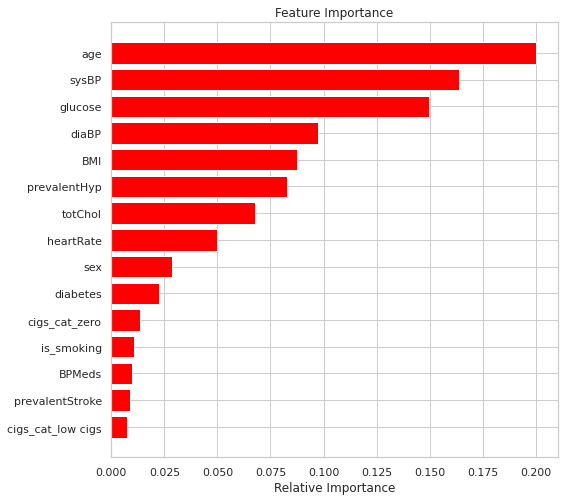

In [74]:
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

In [82]:
from xgboost import XGBClassifier
xgb_classifier=XGBClassifier(scale_pos_weight=8)

In [85]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }
def objective(space):
    clf=XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']),scale_pos_weight=8)
    
    evaluation = [( X_train, Y_train), ( X_test, Y_test)]
    
    clf.fit(X_train, Y_train)
    

    pred = clf.predict(X_test)
    recall = recall_score(Y_test, pred>0.5)
    
    return {'loss': -recall, 'status': STATUS_OK }

In [86]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

100%|██████████| 100/100 [00:15<00:00,  6.55it/s, best loss: -0.803921568627451]
The best hyperparameters are :  

{'colsample_bytree': 0.5320936839428655, 'gamma': 5.9415584948631315, 'max_depth': 15.0, 'min_child_weight': 6.0, 'reg_alpha': 176.0, 'reg_lambda': 0.9065065615478488}


In [88]:
xgb_classifier_t=XGBClassifier(scale_pos_weight=8,colsample_bytree=0.74,gamma=1.14,max_depth=16,min_child_weight=9,reg_alpha=178,reg_lambda=0.99)
xgb_classifier_t.fit(X_train,Y_train)
y_train_pred_xgb_t=xgb_classifier_t.predict(X_train)
y_pred_xgb_t=xgb_classifier_t.predict(X_test)
print(f'Recall score for train data using Xgboost with tuning: {recall_score(Y_train,y_train_pred_xgb_t)}')
print(f'Recall score for test data using Xgboost with tuning: {recall_score(Y_test,y_pred_xgb_t)}')

Recall score for train data using Xgboost with tuning: 0.8679706601466992
Recall score for test data using Xgboost with tuning: 0.7549019607843137


In [90]:
print(classification_report(Y_test,y_pred_xgb_t))

              precision    recall  f1-score   support

           0       0.91      0.42      0.58       576
           1       0.19      0.75      0.30       102

    accuracy                           0.47       678
   macro avg       0.55      0.59      0.44       678
weighted avg       0.80      0.47      0.54       678



In [92]:
print(accuracy_score(Y_test,y_pred_xgb_t))

0.47345132743362833
